In [18]:
import sys
sys.path.insert(0, '..')
import os
import glob
import calendar
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

In [3]:
figdir = "/data/Wind/figures/"
if not os.path.exists(figdir):
    os.mkdir(figdir)

## Input files

In [3]:
datafileu = "/data/Wind/SCOW/wind_stress_zonal_monthly_maps.nc"
datafilev = "/data/Wind/SCOW/wind_stress_meridional_monthly_maps.nc"

## Read wind field (3D)

In [4]:
scowwind = filament.Wind()
scowwind.read_from_scow(datafileu, datafilev)

## Create plots
### Define projection

In [4]:
m = Basemap(projection='ortho',lon_0=-25.,lat_0=0,resolution='c')
m2 = Basemap(projection='ortho',lon_0=-125.,lat_0=0,resolution='c')

In [5]:
# Coordinates of the main upwelling systems
ebuscoordinates = [(-30., -10., 15., 35.),
                   (-138., -120., 30., 45.),
                   (-85., -70., -35., -15.),
                   (6., 20., -35., -15.)
                  ]

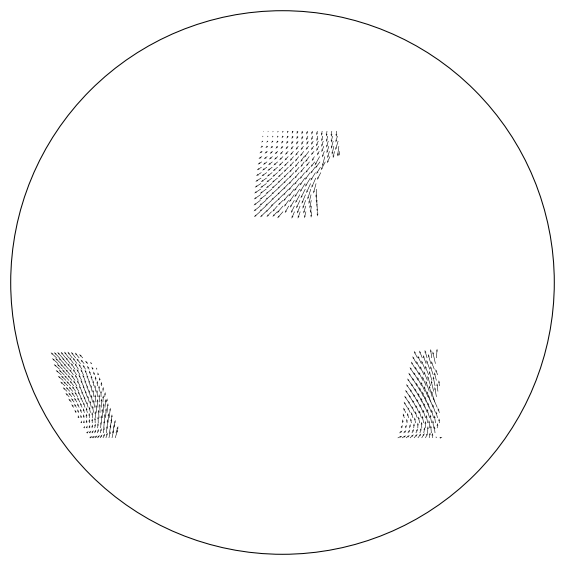

In [7]:
N = 5
fig = plt.figure(figsize=(10, 10))

for coords in ebuscoordinates:
    scowwind = filament.Wind()
    scowwind.read_from_scow(datafileu, datafilev, coords)
    llon, llat = np.meshgrid(scowwind.lon, scowwind.lat)
    lonp, latp = m(llon, llat)
    m.quiver(lonp[::N,::N], latp[::N,::N], 
             np.nanmean(scowwind.uwind, axis=2)[::N,::N], 
             np.nanmean(scowwind.vwind, axis=2)[::N,::N], scale=5, width=.001)
plt.show()
plt.close()

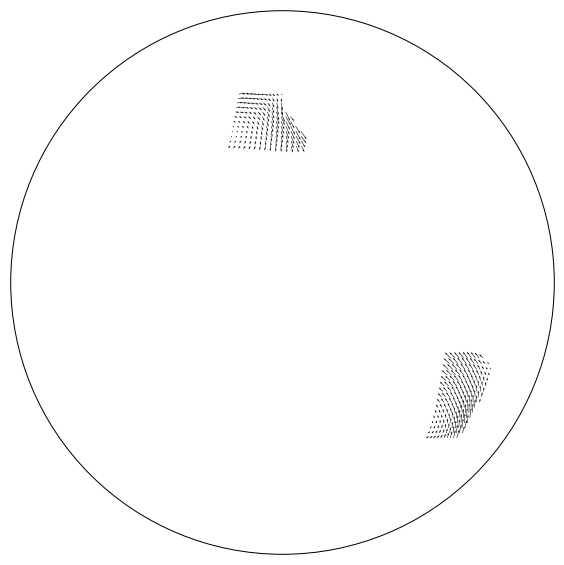

In [8]:
N = 5
fig = plt.figure(figsize=(10, 10))

for coords in ebuscoordinates:
    scowwind = filament.Wind()
    scowwind.read_from_scow(datafileu, datafilev, coords)
    llon, llat = np.meshgrid(scowwind.lon, scowwind.lat)
    lonp, latp = m2(llon, llat)
    m2.quiver(lonp[::N,::N], latp[::N,::N], 
             np.nanmean(scowwind.uwind, axis=2)[::N,::N], 
             np.nanmean(scowwind.vwind, axis=2)[::N,::N], scale=5, width=.001)
plt.show()
plt.close()

### Global coverage

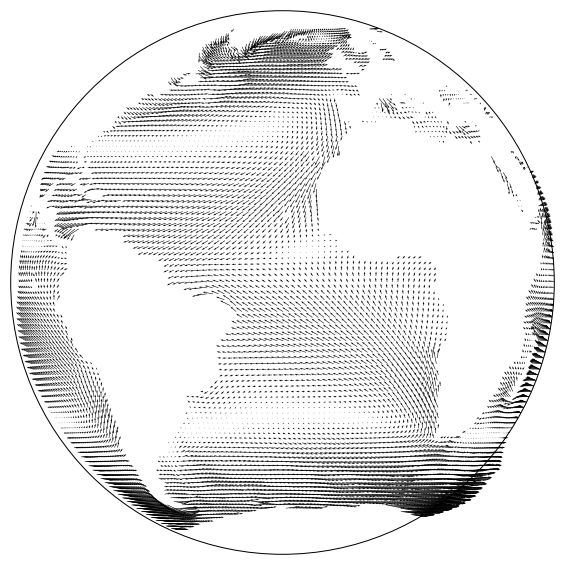

In [9]:
N = 5
fig = plt.figure(figsize=(10, 10))

coords = (-100., 100., -89., 89.)
globalwind = filament.Wind()
globalwind.read_from_scow(datafileu, datafilev, coords)
llon, llat = np.meshgrid(globalwind.lon, globalwind.lat)
lonp, latp = m(llon, llat)
m.quiver(lonp[::N,::N], latp[::N,::N], 
         np.nanmean(globalwind.uwind, axis=2)[::N,::N], 
         np.nanmean(globalwind.vwind, axis=2)[::N,::N], scale=5, width=.001)
#plt.savefig(os.path.join(figdir, "global_wind", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## CCMP wind
Downloaded from http://www.remss.com/measurements/ccmp/

In [6]:
winddir = "/data/Wind/CCMP/"
windclimfile = os.path.join(winddir, "CCMP_Wind_Analysis_climatology_V02.0_L3.5_RSS.nc")

In [7]:
windclim = filament.Wind()
windclim.read_from_ccmp(windclimfile)
windclim.uwind.shape

AttributeError: module 'filament' has no attribute 'Wind'

In [11]:
windclim.lon

array([ 0.125,  0.375,  0.625, ..., -0.625, -0.375, -0.125], dtype=float32)

### Upwelling regions

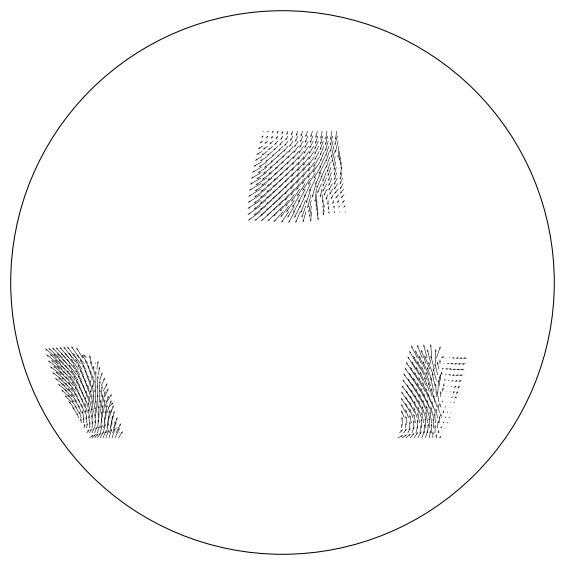

In [14]:
N = 5
fig = plt.figure(figsize=(10, 10))

for coords in ebuscoordinates:
    windregion = filament.Wind()
    windregion.read_from_ccmp(windclimfile, coords)
    llon, llat = np.meshgrid(windregion.lon, windregion.lat)
    lonp, latp = m(llon, llat)
    m.quiver(lonp[::N,::N], latp[::N,::N], 
             np.nanmean(windregion.uwind, axis=0)[::N,::N], 
             np.nanmean(windregion.vwind, axis=0)[::N,::N], scale=250, width=.001)
plt.show()
plt.close()

### Global

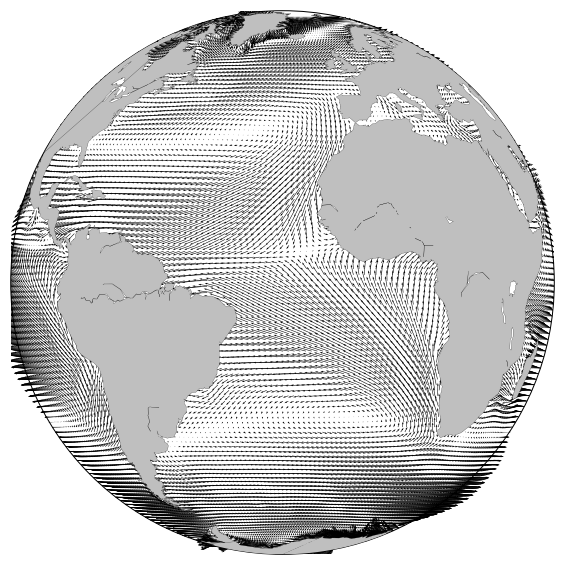

In [15]:
N = 5
fig = plt.figure(figsize=(10, 10))

llon, llat = np.meshgrid(windclim.lon, windclim.lat)
lonp, latp = m(llon, llat)
m.quiver(lonp[::N,::N], latp[::N,::N], 
         np.nanmean(windclim.uwind, axis=0)[::N,::N], 
         np.nanmean(windclim.vwind, axis=0)[::N,::N], scale=250, width=.001)
m.drawcoastlines(linewidth=0.2)
m.fillcontinents(color=".75")
plt.savefig(os.path.join(figdir, "fail02"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### Wind anomalies
We compute the wind speed anomaly for different months.

In [16]:
llon, llat = np.meshgrid(windclim.lon, windclim.lat)
lonp, latp = m(llon, llat)
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

In [24]:
for i in range(1, 13):
    
    fname = os.path.join(winddir, "CCMP_Wind_Analysis_2010{}_V02.0_L3.5_RSS.nc".format(str(i).zfill(2)))
    windmonth = filament.Wind()
    windmonth.read_from_ccmp(fname)
    
    windanom = windmonth.speed.squeeze() - windclim.speed[i-1,:,:]
    
    fig = plt.figure(figsize=(10, 10))
    m.pcolormesh(lonp, latp, windanom, vmin=-3., vmax=3., cmap=plt.cm.RdBu_r)
    m.drawcoastlines(linewidth=0.2)
    m.fillcontinents(color=".75")
    cb = plt.colorbar(extend="both", shrink=0.8)
    cb.set_label("m/s", rotation=0, ha="left", fontsize=12)
    plt.title("Wind speed anomaly $-$ {} 2010".format(calendar.month_name[i]), fontsize=16)
    plt.savefig(os.path.join(figdir, "CCMP_wind_anom_{}".format(str(i).zfill(2))), 
                dpi=300, bbox_inches="tight")
    # plt.show()
    plt.close()

## Daily field

In [58]:
winddir = "/data/Wind/CCMP/"
winddayfile = os.path.join(winddir, "CCMP_RT_Wind_Analysis_20200917_V02.1_L3.0_RSS.nc")
windday = filament.Wind()
windday.read_from_ccmp(winddayfile)

No variable `speed` in the netCDF file


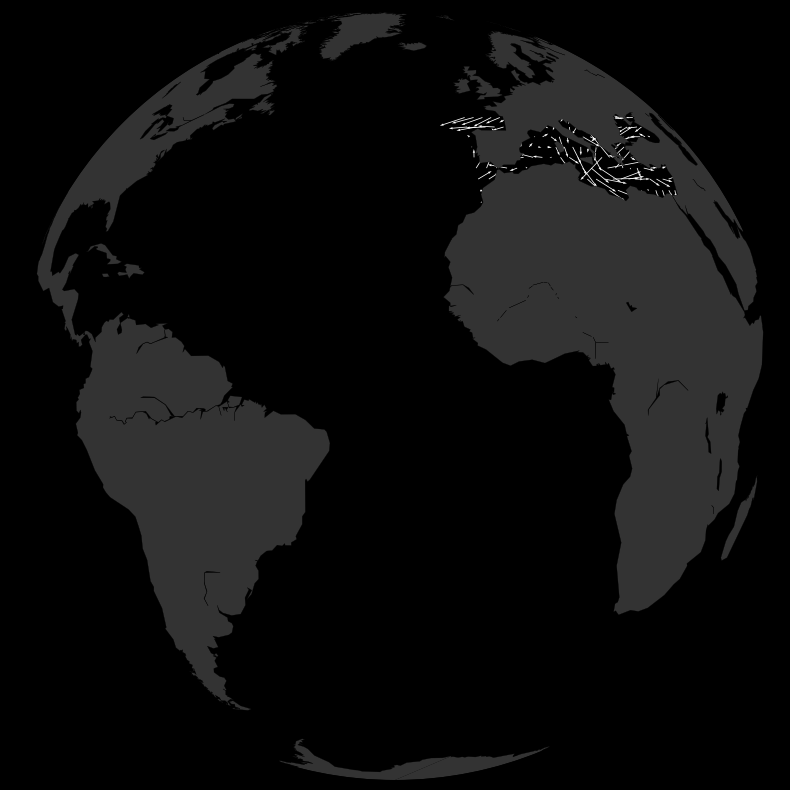

In [86]:
plt.style.use('dark_background')
N = 8
fig = plt.figure(figsize=(10, 10))

llon, llat = np.meshgrid(windday.lon, windday.lat)
lonp, latp = m(llon, llat)
m.quiver(lonp[::N,::N], latp[::N,::N], 
         np.nanmean(windday.u, axis=0)[::N,::N], 
         np.nanmean(windday.v, axis=0)[::N,::N], scale=300, width=.001, color="w")
m.drawcoastlines(linewidth=0.2)
m.fillcontinents(color=".2")
plt.savefig(os.path.join(figdir, "windday.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [98]:
coordsMed = (-6., 40., 30., 48.)
coordsMedZoom = (10., 25., 30., 42.)

In [99]:
m2 = Basemap(projection='merc', llcrnrlon=coordsMed[0], llcrnrlat=coordsMed[2],
            urcrnrlon=coordsMed[1], urcrnrlat=coordsMed[3],
            resolution='i')
m3 = Basemap(projection='merc', llcrnrlon=coordsMedZoom[0], llcrnrlat=coordsMedZoom[2],
            urcrnrlon=coordsMedZoom[1], urcrnrlat=coordsMedZoom[3],
            resolution='h')

In [164]:
def plot_daily_wind(m, wind, N=1, figdir="./", figbasename="wind_CMPP_"):

    ntimes = len(wind.time)
    
    # Loop on time instances present in the file
    for i in range(0, ntimes):
        
        llon, llat = np.meshgrid(wind.lon, wind.lat)
        lonp, latp = m(llon, llat)
        fig = plt.figure(figsize=(12, 8))
        q = m.quiver(lonp, latp, wind.u[i,::N,::N], wind.v[i,::N,::N], 
                       wind.speed[i,::N,::N], scale=250, width=.001, color="k",
                       cmap=plt.cm.hot_r, clim=[0., 20.])
        cb = plt.colorbar(shrink=.85)
        cb.set_label("Wind speed\n(m/s)", rotation=0, ha="left", fontname="Times new roman")

        for l in cb.ax.yaxis.get_ticklabels():
            l.set_family("Times new roman")

        m.drawcoastlines(linewidth=0.2)
        m.fillcontinents(color=".2")

        plt.title(wind.time[i], fontname="Times new roman", fontsize=20)

        fname = "{}_{}".format(figbasename, windday.time[i].strftime("%Y%m%dT%H%M%S"))
        plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")   
        # plt.show()
        plt.close()

In [167]:
windfilelist = sorted(glob.glob(os.path.join(winddir, "CCMP_RT_Wind_Analysis_*15_V02.1_L3.0_RSS.nc")))
for windfile in windfilelist:
    windday = filament.Wind()
    windday.read_from_ccmp(windfile, coordsMedZoom)
    windday.compute_speed()
    
    fname = "wind_CCMP_{}.jpg".format(windday.time[i].strftime("%Y%m%dT%H%M%S"))
    figname = os.path.join(figdir, fname)
    
    plot_daily_wind(m3, windday, N=1, figdir="../figures/wind/")

No variable `speed`  in the netCDF file


In [161]:
windday.lat.shape

(48,)